# Introducción, objetivos y contenido
====================================================================================================================================

* Importación de librerías
* Carga de datos
    * Dataset de restaurantes unívocos
    * Dataset de YELP
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Tips
        * Categorías y atributos
    * Dataset de GOOGLE
        * Restaurantes
        * Reviews
        * Categorías
* Preprocesamiento: gestión final de tipos de datos, valores nulos y duplicados, características
    * Datasets de YELP
    * Datasets de GOOGLE
    * Datasets COMBINADOS
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Categorías
* Análisis de datos
    * Análisis de plantel de restaurantes (oferentes)
    * Análisis de performance de restaurantes
    * Análisis de plantel de usuarios (clientes)
    * Análisis de demanda
    * Análisis de preferencias de usuario
        * Categorías top
        * Atributos
        * Marcas top
        * Locaciones top
    * Análisis de participación del usuario
        * Involucramiento
        * Satisfacción
* Conclusiones

# Importación de librerías
====================================================================================================================================

In [1]:
import pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Carga de datos
=========================================================================================================

## Dataset de restaurantes unívocos
------------------------------------------------------------------------------------------------------

In [2]:
# Listado unívoco de locales de ambos datasets
dfgy_rest_uniques = pd.read_parquet('dfgy_rest_uniques.parquet')

## Datasets de YELP
------------------------------------------------------------------------------------------------------

In [3]:
# Yelp
yelp_rest = pd.read_parquet('dfy_rest.parquet')
yelp_user = pd.read_parquet('dfy_user.parquet')
yelp_checkins = pd.read_parquet('dfy_checkins.parquet')

In [4]:
# Review
yelp_reviews = pd.read_parquet('dfy_reviews.parquet')

In [5]:
# Tips
yelp_tips = pd.read_parquet('dfy_tips.parquet')

In [6]:
# Categorías y atributos
yelp_site_categories = pd.read_parquet('dfy_site_categories.parquet')
yelp_site_attributes = pd.read_parquet('dfy_attributes.parquet')

## Datasets de GOOGLE
------------------------------------------------------------------------------------------------------

In [7]:
# Restaurants
google_rest = pd.read_parquet('dfg_rest.parquet')

In [8]:
# Reviews
google_reviews = pd.read_parquet('dfg_reviews.parquet')

In [9]:
# Categorías y atributos
google_site_categories = pd.read_parquet('dfg_site_categories.parquet')

# Preprocesamiento
=========================================================================================================

## Datasets de YELP
------------------------------------------------------------------------------------------------------

### YELP reviews

In [10]:
print(yelp_reviews.info())
yelp_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  float64       
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
 9   year         1000000 non-null  int32         
 10  month        1000000 non-null  int32         
 11  year_month   1000000 non-null  object        
 12  polarity     1000000 non-null  float64       
 13  sentiment    1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(5)
mem

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,year_month,polarity,sentiment
168831,6FbpKwW2eRQwIOW0B5d2Rg,lu1GHhhuaigzDp7PWXsnJw,6ajnOk0GcY9xbb5Ocaw8Gw,5.0,0,0,0,By far the best antipasto dish I ever ate! Sal...,2017-11-20 23:25:09,2017,11,1711,0.6988,1
57035,kqAOpA1fJCf3TM17JTrk3Q,5J9N4ol0ho5_oDB7x4JrKg,s-Ff-8M5-AR-5jl59lCj1w,3.0,1,1,2,"A nice, roomy, wide open mega sports bar. A fe...",2019-07-23 21:18:21,2019,7,1907,0.9571,1


In [11]:
dfy_reviews = yelp_reviews.copy()

dfy_reviews['source'] = 'yelp'
dfy_reviews = dfy_reviews[['source','business_id','user_id', 'date', 'month', 'year', 'stars', 'polarity', 'sentiment']]
dfy_reviews = dfy_reviews.rename(columns={'business_id': 'site_id', 'date':'datetime', 'stars':'rating'})

print(dfy_reviews.info())
dfy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   source     1000000 non-null  object        
 1   site_id    1000000 non-null  object        
 2   user_id    1000000 non-null  object        
 3   datetime   1000000 non-null  datetime64[ns]
 4   month      1000000 non-null  int32         
 5   year       1000000 non-null  int32         
 6   rating     1000000 non-null  float64       
 7   polarity   1000000 non-null  float64       
 8   sentiment  1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 61.0+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
496936,yelp,o1bd3WLl4McflqjDTJTdHQ,APShH9pWLfhipTq7qS8PZg,2017-07-24 19:38:28,7,2017,4.0,0.8685,1
127990,yelp,x1_HilER7Zuy1QrByHHhxg,HpoUtJa-vxrgb2D4R_3hYQ,2016-02-06 00:19:59,2,2016,4.0,0.9674,1


### YELP restaurants

In [12]:
print(yelp_rest.info())
yelp_rest.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212998 entries, 0 to 212997
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            212998 non-null  object 
 1   name                   212998 non-null  object 
 2   city                   212998 non-null  object 
 3   postal_code            212998 non-null  object 
 4   latitude               212998 non-null  float64
 5   longitude              212998 non-null  float64
 6   stars                  212998 non-null  float64
 7   review_count           212998 non-null  int64  
 8   is_open                212998 non-null  int64  
 9   state                  212998 non-null  object 
 10  state_city             212998 non-null  object 
 11  city_postalcode        212998 non-null  object 
 12  state_city_postalcode  212998 non-null  object 
 13  categories             133777 non-null  object 
 14  food                   133777 non-nu

,business_id,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,price
122885,S1qO7k5Ycvosxt11dlgt_Q,Solara-Tec,Tampa,33603,27.990358,-82.484876,4.5,10,0,FL,FL - Tampa,Tampa - 33603,FL - Tampa - 33603,None,None,1.250000
206607,HjYXFlkfuLbQMfX_Ase-fA,Latitude 39 Apartments,Reno,89521,39.442537,-119.759961,4.0,13,1,NV,NV - Reno,Reno - 89521,NV - Reno - 89521,None,None,1.428571
165100,nWQ5w5bOYKL2idwZbcvqvw,CrossFit Main Line - Ardmore,Ardmore,19003,40.006007,-75.292744,4.0,5,1,PA,PA - Ardmore,Ardmore - 19003,PA - Ardmore - 19003,None,None,1.200000
71603,sPFVy3YI8viClkH08SPLeg,McDonald's,Boise,83704,43.620367,-116.304731,2.5,8,1,ID,ID - Boise,Boise - 83704,ID - Boise - 83704,Food,yes,1.285714
137045,u9Qf_qaesZp0C3-6GT8oKg,Insight Family Eyecare,Wesley Chapel,33544,28.186467,-82.359813,3.0,7,1,FL,FL - Wesley Chapel,Wesley Chapel - 33544,FL - Wesley Chapel - 33544,None,None,1.500000


In [13]:
dfy_rest = yelp_rest

dfy_rest['source'] = 'yelp'
dfy_rest = dfy_rest[['source','business_id', 'name', 'state', 'city', 'postal_code', 'price', 'stars', 'review_count']]
dfy_rest = dfy_rest.rename(columns={'business_id': 'site_id', 'stars':'rating_avg', 'review_count':'reviews_count'})

dfy_rest.dropna(subset=['price'], inplace=True)

# Agregado de fecha de inicio de acitividad
dfy_rest_date_start = dfy_reviews.groupby('site_id')['datetime'].min().reset_index()
dfy_rest = pd.merge(dfy_rest, dfy_rest_date_start, how='left', on=['site_id'])
dfy_rest = dfy_rest.rename(columns={'datetime': 'date_start'})

dfy_rest['year'] = dfy_rest['date_start'].dt.year
dfy_rest['month'] = dfy_rest['date_start'].dt.month

dfy_rest['state_city'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ')
dfy_rest['city_postalcode'] = dfy_rest['city'].str.cat(dfy_rest['postal_code'], sep=' - ')
dfy_rest['state_city_postalcode'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfy_rest['postal_code'], sep=' - ')

print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
10145,yelp,indl78vhU8vTjq_kBJXhaA,Well Crafted Beer Company,PA,Lansdale,19446,1.111111,4.5,65,2018-08-05 01:57:31,2018.0,8.0,PA - Lansdale,Lansdale - 19446,PA - Lansdale - 19446
24067,yelp,a_E7wF9Kz-Uw4Lo3K3qwvw,ALDI,PA,Bensalem,19020,1.173913,3.5,13,2016-12-04 23:53:09,2016.0,12.0,PA - Bensalem,Bensalem - 19020,PA - Bensalem - 19020


In [14]:
print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
23800,yelp,wXQwMT25odPHQ2LnIksr5Q,Grannies Restaurant,FL,Ruskin,33570,1.000000,3.5,20,2013-07-18 17:48:23,2013.0,7.0,FL - Ruskin,Ruskin - 33570,FL - Ruskin - 33570
98067,yelp,QjuF7shie3KfnZUE_CMy6A,Cheeseburger Eddie's,LA,Metairie,70006,1.090909,3.0,52,2011-11-28 20:32:53,2011.0,11.0,LA - Metairie,Metairie - 70006,LA - Metairie - 70006


### YELP user

In [15]:
dfy_user =yelp_user.copy()
print(dfy_user.info())
dfy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   review_count   int64         
 2   fans           int64         
 3   yelping_since  datetime64[ns]
 4   useful         int64         
 5   funny          int64         
 6   cool           int64         
 7   average_stars  float64       
 8   year           int32         
 9   month          int32         
 10  year_month     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(2)
memory usage: 160.6+ MB
None


,user_id,review_count,fans,yelping_since,useful,funny,cool,average_stars,year,month,year_month
1797788,N_idABt7OZnNfIBTC8Caaw,2,0,2009-08-29 05:30:39,6,1,2,4.50,2009,8,0908
1893196,DLUPBtOXurA9gXnoMbUA7w,3,0,2015-04-04 21:38:54,2,0,1,4.67,2015,4,1504


In [16]:
# Selección de campos
dfy_user = dfy_user[['user_id', 'review_count', 'yelping_since', 'average_stars']]
dfy_user = dfy_user.rename(columns={'review_count':'reviews_count', 'yelping_since':'date_start', 'average_stars':'rating_avg'})

dfy_user['date_start'] = pd.to_datetime(dfy_user['date_start'], errors='coerce')
dfy_user.reset_index(drop=True, inplace=True)

dfy_user['year'] = dfy_user['date_start'].dt.year
dfy_user['month'] = dfy_user['date_start'].dt.month

dfy_user.info()
dfy_user.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 80.3+ MB


,user_id,reviews_count,date_start,rating_avg,year,month
1772237,HbkiufLRWDM4bfq7DAZjgA,22,2015-02-09 04:07:33,4.48,2015,2
1202124,9Qcbl2IJU5PxUgRRGNlc8Q,2,2011-02-17 00:41:41,3.00,2011,2
1709031,jKl6wFO0w53T9-GXrdRRnQ,6,2018-10-07 20:51:19,4.50,2018,10
2065299,Rj0npCu1dn0oV8fhEgxJmQ,534,2011-07-11 02:22:07,4.06,2011,7
1378521,RvWkmf55fMJoj0u9O2GWUw,8,2014-10-26 20:26:35,3.13,2014,10


### YELP checkin

In [17]:
print(yelp_checkins.shape)
yelp_checkins.sample(2)

(36370745, 18)


,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,year,month
11567805,Izj9SZocemNgqLKi4h8R4w,2019-02-18 14:47:54,Bon Appetit Restaurant,Dunedin,34698,28.013263,-82.793286,3.5,493,1,FL,FL - Dunedin,Dunedin - 34698,FL - Dunedin - 34698,Restaurants,yes,2019,2
17002862,SmeMEWPwb5vl4m0UbYnugA,2012-01-29 06:07:24,Blue Nile,New Orleans,70116,29.963179,-90.057889,4.0,241,1,LA,LA - New Orleans,New Orleans - 70116,LA - New Orleans - 70116,Bars,yes,2012,1


In [18]:
dfy_checkins = yelp_checkins[['business_id', 'date']]
dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'}, inplace=True)

dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
dfy_checkins['month'] = dfy_checkins['datetime'].dt.month

dfy_checkins['source'] = 'yelp'

dfy_checkins = dfy_checkins[['source', 'site_id', 'datetime', 'year', 'month']]

/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_30575/1695596543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'}, inplace=True)
/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_30575/1695596543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_30575/1695596543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [19]:
print(dfy_checkins.info())
dfy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 36370745 entries, 0 to 36431299
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 1.4+ GB
None


,source,site_id,datetime,year,month
3754091,yelp,5Z7HXqp22lSiN0Q8iF94hQ,2012-01-14 07:46:35,2012,1
21594328,yelp,_aZAD5C0maYABO9KgddpPQ,2010-09-12 19:26:10,2010,9


### YELP categories

In [20]:
yelp_site_categories.info()
yelp_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   site_id     149643 non-null  object
 1   categories  149643 non-null  object
 2   food        149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,site_id,categories,food
127067,BqtxPTy5-b3gBBxGk-2nfg,Desserts,yes
110876,GiU2GxSq-LV6pw1LWpaWLA,Specialty Food,yes


In [21]:
dfy_categories = yelp_site_categories[['site_id', 'categories']]
dfy_categories['source'] = 'yelp'
dfy_categories = dfy_categories[['source', 'site_id', 'categories']]

dfy_categories.info()
dfy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      149643 non-null  object
 1   site_id     149643 non-null  object
 2   categories  149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,source,site_id,categories
58397,yelp,6y1SdVxPauHLfCxgf5yZDA,Bars
36257,yelp,mw-Vn0mmSTYR1ZkQaHdeBQ,Fast Food


### YELP attributes

In [22]:
dfy_attributes = yelp_site_attributes.copy()

print(dfy_attributes.shape)
dfy_attributes.sample(2)

(1206820, 2)


,business_id,attributes
35990,Fyw7Nszsz2E6ZKy7gjPtDw,BusinessAcceptsCreditCards
101791,wvgaFGDyD3nTYZubTahH2A,RestaurantsPriceRange2


## Datasets GOOGLE
------------------------------------------------------------------------------------------------------

### GOOGLE reviews

In [23]:
print(google_reviews.info())
google_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          float64       
 1   gmap_id          object        
 2   state            object        
 3   datetime         datetime64[ns]
 4   rating           int64         
 5   vader_polarity   float64       
 6   vader_sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 232.1+ MB
None


,user_id,gmap_id,state,datetime,rating,vader_polarity,vader_sentiment
202692,1.097204e+20,0x862d3b5e389cd873:0x4fc605afe795e050,AR,2019-06-06 07:59:54.896,5,0.8852,1
2545665,1.167554e+20,0x89c24f2fdc03129d:0x9cc50b4dddd5a60,NY,2019-12-27 13:38:32.432,5,0.9737,1


In [24]:
dfg_reviews = google_reviews
dfg_reviews['source'] = 'google'
dfg_reviews['month'] = dfg_reviews['datetime'].dt.month
dfg_reviews['year'] = dfg_reviews['datetime'].dt.year
dfg_reviews = dfg_reviews[['source', 'gmap_id','user_id', 'datetime', 'month', 'year', 'rating', 'vader_polarity', 'vader_sentiment']]
dfg_reviews = dfg_reviews.rename(columns={'gmap_id': 'site_id', 'vader_polarity':'polarity', 'vader_sentiment':'sentiment'})

In [25]:
dfg_reviews.sample(2)

,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
2914340,google,0x89acf78a7e1c0259:0x771dde4e8a04d66f,1.050784e+20,2019-01-08 13:53:35.906,1,2019,4,0.7906,1
3856243,google,0x864e6d7fa845872d:0xa0e11e1554de29c,1.087709e+20,2021-03-06 16:50:35.517,3,2021,5,0.6239,1


### GOOGLE restaurants

In [26]:
print(google_rest.info())
google_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 223485 entries, 2 to 274996
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            223485 non-null  object 
 1   address_full    223485 non-null  object 
 2   gmap_id         223485 non-null  object 
 3   latitude        223485 non-null  float64
 4   longitude       223485 non-null  float64
 5   avg_rating      223485 non-null  float64
 6   num_of_reviews  223485 non-null  int64  
 7   price           223485 non-null  float64
 8   address         223485 non-null  object 
 9   city            223485 non-null  object 
 10  postal_code     223485 non-null  object 
 11  state           223485 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 22.2+ MB
None


,name,address_full,gmap_id,latitude,longitude,avg_rating,num_of_reviews,price,address,city,postal_code,state
44036,Santa Barbara Chicken Ranch,"Santa Barbara Chicken Ranch, 149 N Fairview Av...",0x80e940636c444b4d:0x7c867f367a21fa71,34.441786,-119.832707,4.2,218,1.0,149 N Fairview Ave #2304,Goleta,93117,CA
116032,Burger King,"Burger King, 1012 N County Rd 260, Clyde, OH 4...",0x883bcb9c77639acd:0xe2c54818d319085f,41.369218,-82.956396,2.1,67,1.0,1012 N County Rd 260,Clyde,43410,OH


In [27]:
dfg_rest = google_rest
dfg_rest['source'] = 'google'
dfg_rest = dfg_rest[['source','gmap_id', 'name', 'state', 'city', 'postal_code', 'price', 'avg_rating', 'num_of_reviews']]
dfg_rest = dfg_rest.rename(columns={'gmap_id': 'site_id', 'avg_rating':'rating_avg', 'num_of_reviews':'reviews_count'})

# Agregado de fecha de inicio de acitividad
dfg_rest_date_start = dfg_reviews.groupby('site_id')['datetime'].min().reset_index()
dfg_rest = pd.merge(dfg_rest, dfg_rest_date_start, how='left', on=['site_id'])
dfg_rest = dfg_rest.rename(columns={'datetime': 'date_start'})

dfg_rest['year'] = dfg_rest['date_start'].dt.year
dfg_rest['month'] = dfg_rest['date_start'].dt.month

dfg_rest['state_city'] = dfg_rest['state'].str.cat(dfg_rest['city'], sep=' - ')
dfg_rest['city_postalcode'] = dfg_rest['city'].str.cat(dfg_rest['postal_code'], sep=' - ')
dfg_rest['state_city_postalcode'] = dfg_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfg_rest['postal_code'], sep=' - ')


In [28]:
print(dfg_rest.info())
dfg_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223485 entries, 0 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 223485 non-null  object        
 1   site_id                223485 non-null  object        
 2   name                   223485 non-null  object        
 3   state                  223485 non-null  object        
 4   city                   223485 non-null  object        
 5   postal_code            223485 non-null  object        
 6   price                  223485 non-null  float64       
 7   rating_avg             223485 non-null  float64       
 8   reviews_count          223485 non-null  int64         
 9   date_start             134644 non-null  datetime64[ns]
 10  year                   134644 non-null  float64       
 11  month                  134644 non-null  float64       
 12  state_city             223485 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
163805,google,0x87ded724e776b19d:0xb81b2ba515f7f33b,Indie Eatery,MO,St Peters,63376,1.285714,5.0,107,2018-09-22 15:57:03.445,2018.0,9.0,MO - St Peters,St Peters - 63376,MO - Zionsville - 63376
43217,google,0x8837282f107ba5ab:0x5196801f2bbf6516,Two Goldens Tavern,OH,Massillon,44647,1.000000,4.3,128,2015-03-25 06:00:17.625,2015.0,3.0,OH - Massillon,Massillon - 44647,OH - Santa Barbara - 44647


### GOOGLE user (creación de dataset)

In [29]:
dfg_user = dfg_reviews.groupby(['user_id']).agg({'site_id': 'count', 'datetime': 'min', 'rating': 'mean'}).reset_index()
dfg_user = dfg_user.rename(columns={'site_id':'reviews_count', 'datetime':'date_start', 'rating':'rating_avg'})
dfg_user['year'] = dfg_user['date_start'].dt.year
dfg_user['month'] = dfg_user['date_start'].dt.month

dfg_user.sample(2)


,user_id,reviews_count,date_start,rating_avg,year,month
158554,1.012697e+20,1,2016-10-10 18:28:31.930,5.0,2016,10
1015481,1.071825e+20,5,2019-05-09 13:21:40.875,4.4,2019,5


### GOOGLE checkins (creación de dataset)

In [30]:
dfg_checkins = dfg_reviews[['source', 'site_id', 'datetime', 'year', 'month']]

In [31]:
print(dfg_checkins.info())
dfg_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 132.6+ MB
None


,source,site_id,datetime,year,month
3642131,google,0x887cdba077274d2f:0xfecb919dde48b801,2019-10-04 12:12:36.257,2019,10
2755392,google,0x89c260a449babad3:0xb15d1b6e6d26bc02,2018-09-30 05:39:28.668,2018,9


### GOOGLE categories

In [32]:
google_site_categories.info()
google_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   site_id   626995 non-null  object
 1   category  626995 non-null  object
dtypes: object(2)
memory usage: 14.4+ MB


,site_id,category
90055,0x89c2e86c81bc2cff:0xf45f077bdb5465d2,Bar
270409,0x884ebe9f4e3e7ed7:0x1810233aa4415639,Campground


In [33]:
dfg_categories = google_site_categories.copy()

dfg_categories.rename(columns={'category': 'categories'}, inplace=True)
dfg_categories['source'] = 'google'
dfg_categories = dfg_categories[['source', 'site_id', 'categories']]

dfg_categories.info()
dfg_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      626995 non-null  object
 1   site_id     626995 non-null  object
 2   categories  626995 non-null  object
dtypes: object(3)
memory usage: 19.1+ MB


,source,site_id,categories
216091,google,0x89c6ceea6934db91:0x9778e04ca049f952,Chicken wings restaurant
33453,google,0x87530ed8cf566b99:0xf91a0c6068f0f0bb,Vegetarian restaurant


## Datasets COMBINADOS
------------------------------------------------------------------------------------------------------

### Dataset RESTAURANTS

In [34]:
# Filtrado
dfy_rest = dfy_rest[dfy_rest['site_id'].isin(dfgy_rest_uniques['business_id'])]
# Union
dfgy_rest = pd.concat([dfy_rest, dfg_rest])

print(dfgy_rest.info())
dfgy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 342834 entries, 3 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 342834 non-null  object        
 1   site_id                342834 non-null  object        
 2   name                   342834 non-null  object        
 3   state                  342834 non-null  object        
 4   city                   342834 non-null  object        
 5   postal_code            342834 non-null  object        
 6   price                  342834 non-null  float64       
 7   rating_avg             342834 non-null  float64       
 8   reviews_count          342834 non-null  int64         
 9   date_start             247726 non-null  datetime64[ns]
 10  year                   247726 non-null  float64       
 11  month                  247726 non-null  float64       
 12  state_city             342834 non-null  object   

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
176789,google,0x89c0e9a2641f8731:0xede29be46d33a2f6,Ichiban Japanese Cuisine,NJ,Northfield,8225,1.0,4.6,94,2016-03-07 13:48:49.950,2016.0,3.0,NJ - Northfield,Northfield - 8225,NJ - Indianapolis - 8225
151554,google,0x88f08685d51b7cef:0xf29519946cf4b796,Parker's Kitchen,GA,Lyons,30436,1.0,3.5,8,NaT,NaN,NaN,GA - Lyons,Lyons - 30436,GA - Lafayette Hill - 30436


### Dataset USER

In [35]:
dfgy_user = pd.concat([dfy_user, dfg_user])

print(dfgy_user.info())
dfgy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 4756911 entries, 0 to 2651313
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 217.8+ MB
None


,user_id,reviews_count,date_start,rating_avg,year,month
403035,102987160527870230528.0,14,2017-01-09 07:11:34.714,4.928571,2017,1
1922623,113429249022779441152.0,1,2019-09-02 12:03:37.652,5.000000,2019,9


### Dataset CHECKINS

In [36]:
# Filtrado
dfy_checkins = dfy_checkins[dfy_checkins['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_checkins = pd.concat([dfy_checkins, dfg_checkins])

print(dfgy_checkins.info())
dfgy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 35223049 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 1.3+ GB
None


,source,site_id,datetime,year,month
1837146,google,0x8824adf9184495f5:0x5f08f45e09f45af6,2019-08-31 14:40:58.417,2019,8
361882,google,0x80c2cf8df746e2a3:0x57a70d5809849258,2019-09-22 20:51:40.396,2019,9


### Dataset REVIEWS

In [37]:
# Filtrado
dfy_reviews = dfy_reviews[dfy_reviews['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_reviews = pd.concat([dfy_reviews, dfg_reviews])

print(dfgy_reviews.info())
dfgy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 5204599 entries, 0 to 4346286
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   source     object        
 1   site_id    object        
 2   user_id    object        
 3   datetime   datetime64[ns]
 4   month      int32         
 5   year       int32         
 6   rating     float64       
 7   polarity   float64       
 8   sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 357.4+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
3641687,google,0x885e2bbc403e6bc7:0x325829b23a9fc5cd,114445996964844142592.0,2020-09-23 16:55:54.812,9,2020,5.0,0.7506,1
3797554,google,0x864e6d140b09124d:0xff2b2a859264bd98,114590910686861000704.0,2019-06-24 14:46:36.353,6,2019,5.0,0.8770,1


### Dataset CATEGORIES

In [38]:
# Filtrado
dfy_categories = dfy_categories[dfy_categories['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_categories = pd.concat([dfy_categories, dfg_categories])

print(dfgy_categories.info())
dfgy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 744630 entries, 0 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      744630 non-null  object
 1   site_id     744630 non-null  object
 2   categories  744630 non-null  object
dtypes: object(3)
memory usage: 22.7+ MB
None


,source,site_id,categories
230870,google,0x88690b109f1879ab:0xa2eec43b73826ce,Restaurant
204119,google,0x5485a3bc68444173:0xaee0a39ace0cb469,Bar


# Análisis de datos
=========================================================================================================

## Análisis de plantel de restaurantes (oferentes)

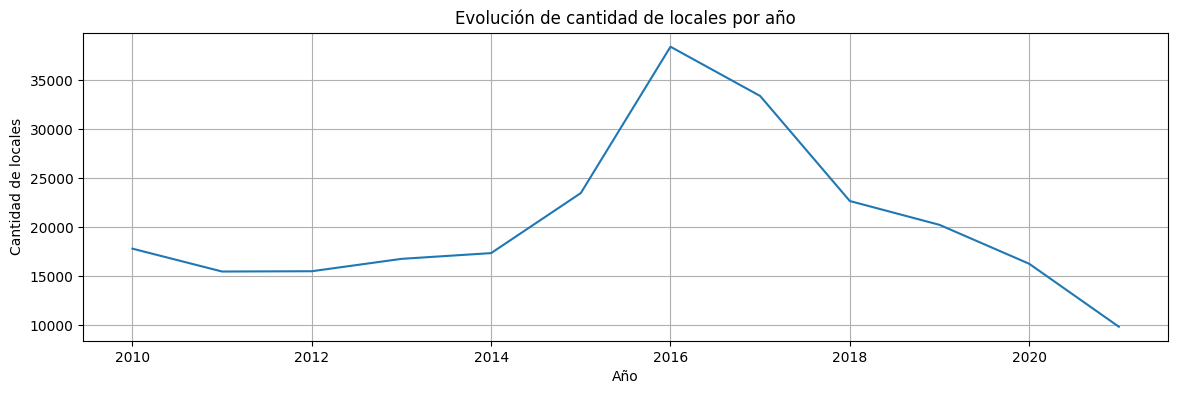

In [39]:
rest_evolution = dfgy_rest.groupby(['year']).agg({'site_id': 'count'}).reset_index()
rest_evolution = rest_evolution.loc[(rest_evolution['year'] >= 2010) & (rest_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_evolution, x='year', y='site_id')
plt.title('Evolución de cantidad de locales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de locales')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de locales registrados en yelp y google a lo largo del tiempo, medido en años
* Se observan claramente las fases de:
    * Nacimiento, en 2010
    * Evolución y desarrollo, entre 2012 y 2014
    * Posicionamiento y estabilización en el mercado, entre 2015 y 2019 
    * Involución, en 2020 -- esto último causado por el covid19

## Análisis de performance de restaurantes

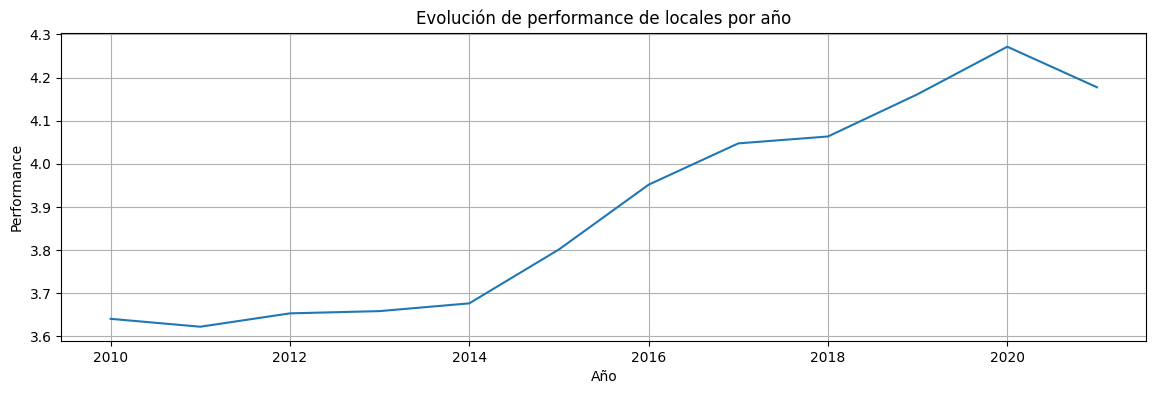

In [41]:
rest_performance = dfgy_rest.groupby(['year']).agg({'rating_avg': 'mean'}).reset_index()
rest_performance = rest_performance.loc[(rest_performance['year'] >= 2010) & (rest_performance['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_performance, x='year', y='rating_avg')
plt.title('Evolución de performance de locales por año')
plt.xlabel('Año')
plt.ylabel('Performance')
plt.grid(True)

Conclusión:
* Se muestra el rating promedio a lo largo del tiempo de todos los locales registrados
* Se observa una clara tendencia a la mejora del rating, lo cual se traduce en el involucramiento de los oferentes para cuidar su clientela. 
* Esta tendencia tiene un alto impacto social, ya que contribuye a instalar la mentalidad de satisfacción del cliente

## Análisis de plantel de usuarios (clientes)

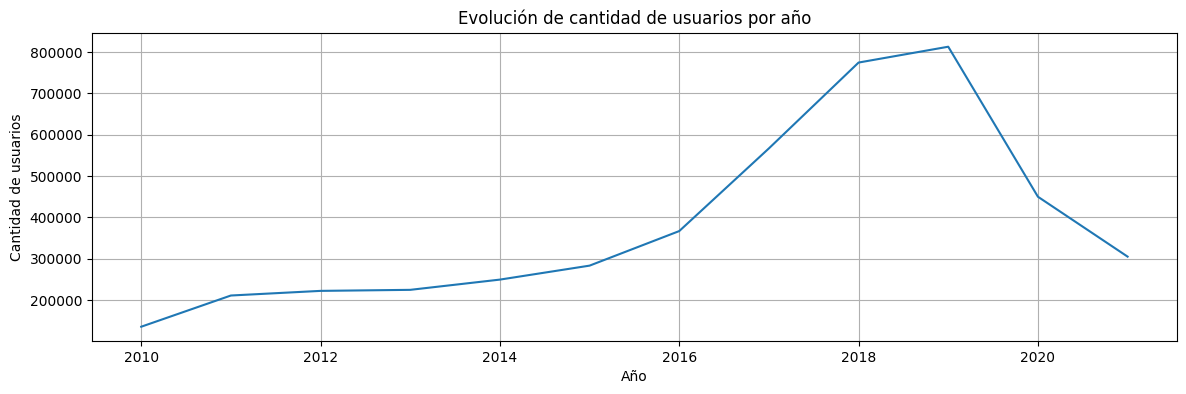

In [43]:
user_evolution = dfgy_user.groupby(['year']).agg({'user_id': 'count'}).reset_index()
user_evolution = user_evolution.loc[(user_evolution['year'] >= 2010) & (user_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=user_evolution, x='year', y='user_id')
plt.title('Evolución de cantidad de usuarios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)

Conclusión:
* Se muestran a lo largo del tiempo, la cantidad de usuarios registrados en yelp y google
* Se observa una clara tendencia de aumento de usuarios
* Se observa una clara disminución a partir de 2019, esto último causado por el fenómeno de covid19

## Análisis de demanda

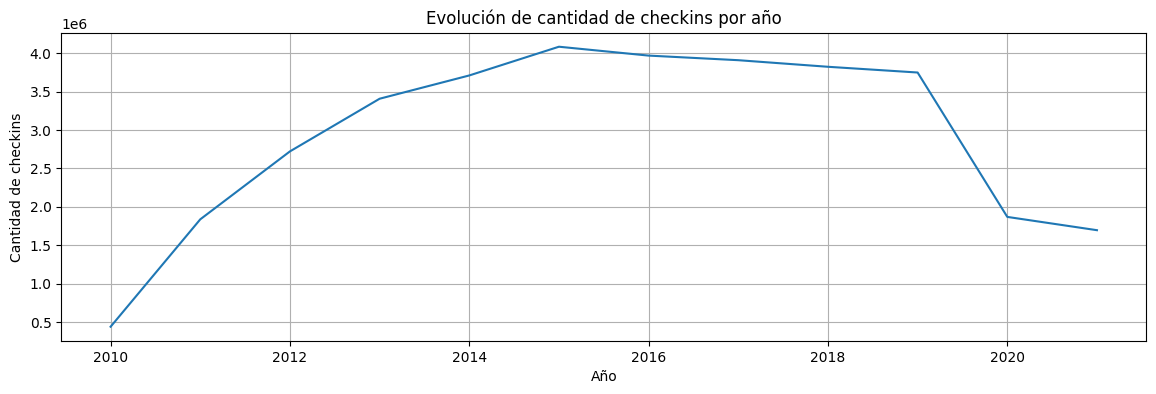

In [44]:
checkins_evolution = dfgy_checkins.groupby(['year']).agg({'datetime': 'count'}).reset_index()
checkins_evolution = checkins_evolution.loc[(checkins_evolution['year'] >= 2010) & (checkins_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=checkins_evolution, x='year', y='datetime')
plt.title('Evolución de cantidad de checkins por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de checkins')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de check-ins registrados en yelp a lo largo del tiempo, medido en años
* La baja de actividad a partir del 2015 puede deberse a la fuerte entrada del mercado de delivery

## Análisis de preferencias de usuario

### Categorías top

In [45]:
dfgy_categories_food_edited = pd.read_csv('dataset_gy_categories_food_edited.csv')
dfgy_categories_food_edited

,Id,source,categories,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,1,yelp,Restaurants,general,Restaurants,Restaurants,restaurants,restaurant
1,2,yelp,Food,general,Food,Food,food,food
2,3,yelp,Burgers,burger,Burgers,Burgers,burgers,burgers
3,4,yelp,Fast Food,fast food,Fast Food,Fast Food,fast food,fast food
4,5,yelp,Sandwiches,burger,Sandwiches,Sandwiches,sandwiches,sandwiches
...,...,...,...,...,...,...,...,...
444,445,google,Yakiniku restaurant,regional,Yakiniku,Yakiniku,yakiniku,yakiniku
445,446,google,Yakisoba Restaurant,regional,Yakisoba,Yakisoba,yakisoba,yakisoba
446,447,google,Yakitori restaurant,regional,Yakitori,Yakitori,yakitori,yakitori
447,448,google,Yemenite restaurant,regional,Yemenite,Yemenite,yemenite,yemenite


In [46]:
dfgy_categories_final = pd.merge(dfgy_categories, dfgy_categories_food_edited, on='categories')
dfgy_categories_final

,source_x,site_id,categories,Id,source_y,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,yelp,MTSW4McQd7CbVtyjqoe9mw,Food,2,yelp,general,Food,Food,food,food
1,yelp,mWMc6_wTdE0EUBKIGXDVfA,Food,2,yelp,general,Food,Food,food,food
2,yelp,CF33F8-E6oudUQ46HnavjQ,Food,2,yelp,general,Food,Food,food,food
3,yelp,bBDDEgkFA1Otx9Lfe7BZUQ,Food,2,yelp,general,Food,Food,food,food
4,yelp,eEOYSgkmpB90uNA7lDOMRA,Food,2,yelp,general,Food,Food,food,food
...,...,...,...,...,...,...,...,...,...,...
549791,google,0x80ec1fd3d42c9afb:0x90a7b30788182fc4,Sfiha restaurant,373,google,regional,Sfiha,Sfiha,sfiha,sfiha
549792,google,0x87e4f11cdb194ced:0x9f69c8ed25a28eb2,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
549793,google,0x89c2f9331071005d:0x308aad6c8c05becd,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
549794,google,0x80deaa0b093ecaa5:0xca75dfda7eacf203,Steamboat restaurant,398,google,regional,Steamboat,Steamboat,steamboat,steamboat


Text(0, 0.5, 'SUPRA-Categoría')

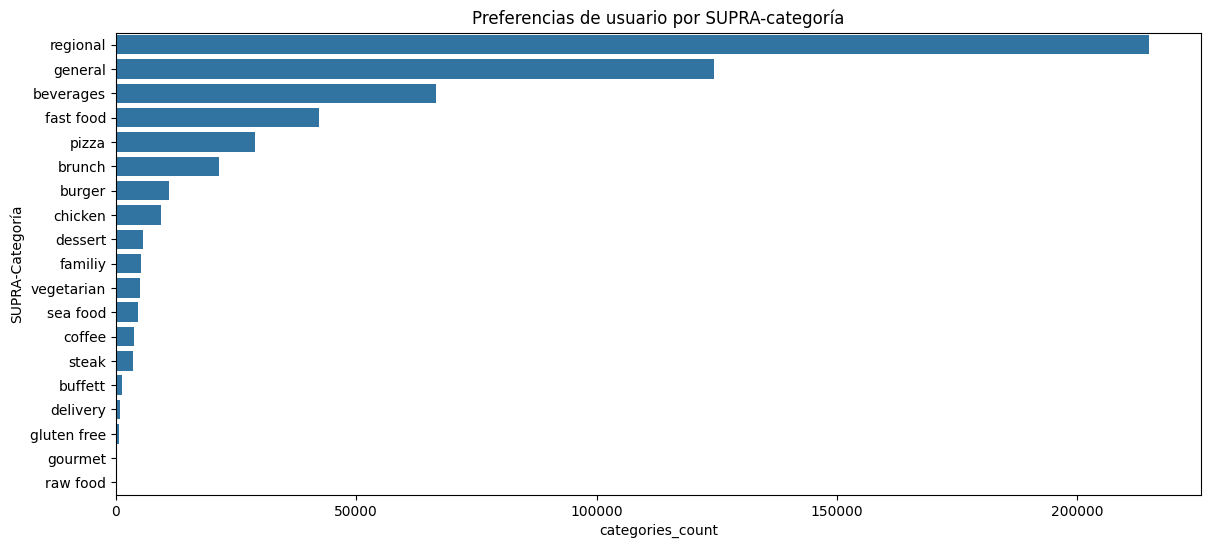

In [47]:
dfgy_categories_count = dfgy_categories_final.groupby('supracategory')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="supracategory", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por SUPRA-categoría')
plt.ylabel('SUPRA-Categoría')

Conclusión:
* Se muestran las "supra-categorías" más buscadas
* La característica denominada "supra-categoría" se ha incorporado en el modelo para ahondar en el conocimiento del usuario
* Se observa que la supra-categoría de "beverages" que contiene bares y pubs, contiene a un tipo de producto que puede ser de interés para los clientes

Text(0, 0.5, 'Categoría')

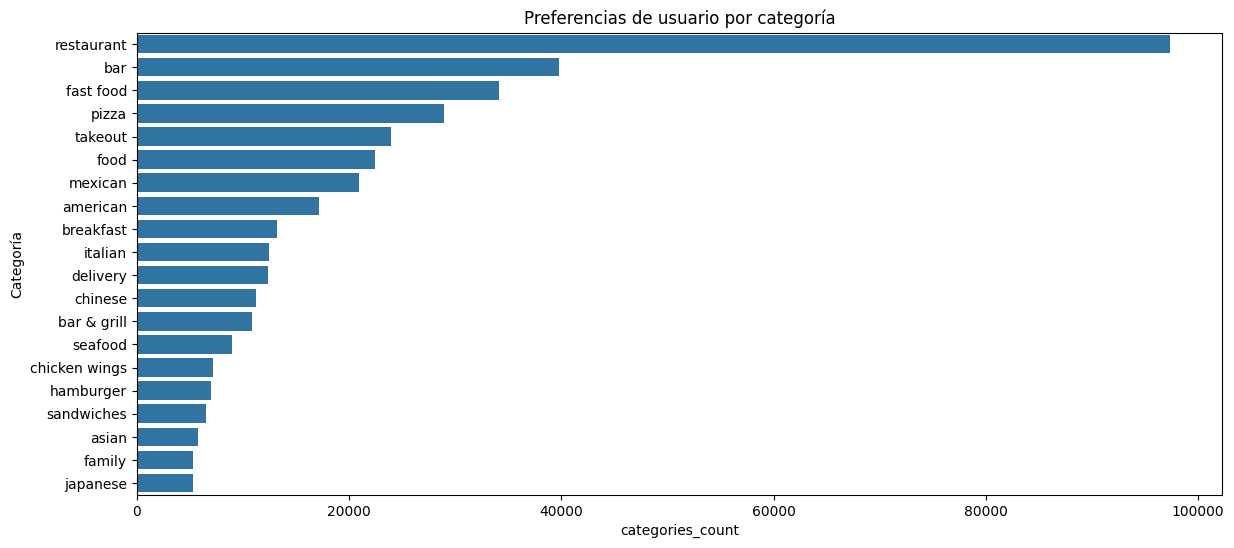

In [48]:
dfgy_categories_count = dfgy_categories_final.groupby('category_edited4')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="category_edited4", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por categoría')
plt.ylabel('Categoría')

### Atributos top

Text(0, 0.5, 'Atributos')

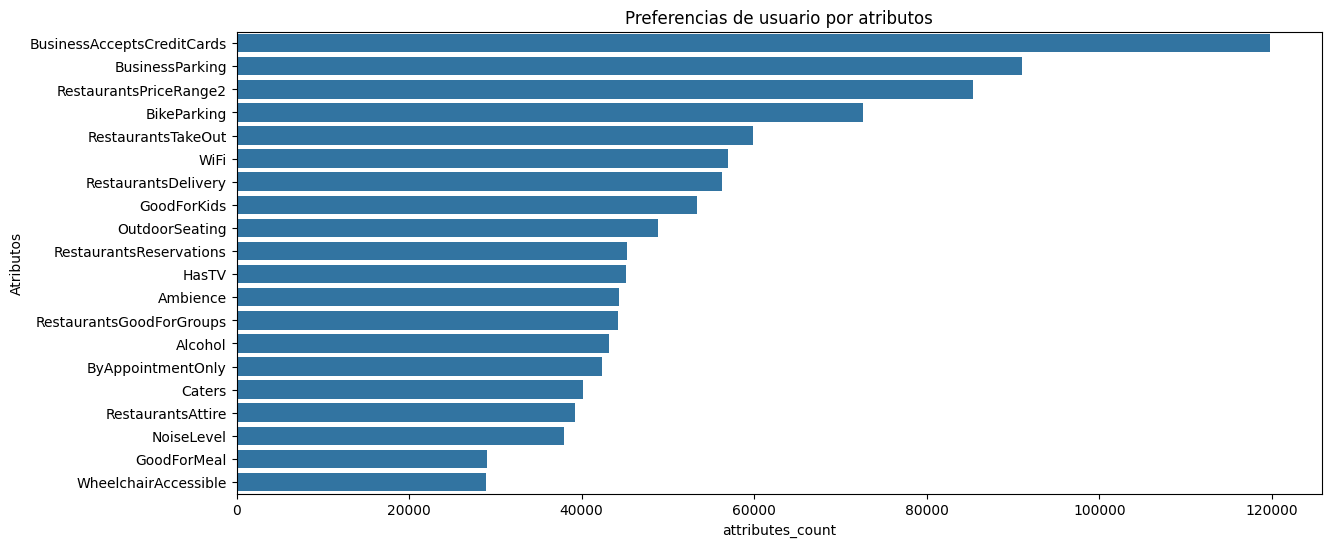

In [49]:
dfy_attributes_count = dfy_attributes.groupby('attributes')['business_id'].count().reset_index()
dfy_attributes_count.rename(columns={'business_id': 'attributes_count'}, inplace=True)
dfy_attributes_count.sort_values('attributes_count', ascending=False, inplace=True)
dfy_attributes_count


plt.figure(figsize=(14, 6))
sns.barplot(x="attributes_count", y="attributes", data=dfy_attributes_count.head(20))
plt.title('Preferencias de usuario por atributos')
plt.ylabel('Atributos')

Conclusión:
* Se observan los atributos más valorados por el mercado de USA
* El atributo líder es el que facilita el pago con tarjetas de crédito
* Resulta de gran interés para la clientela que el establecimiento cuente con parking

### Marcas top

In [50]:
dfgy_names_top = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'name']], how='left', on='site_id')
dfgy_names_top = dfgy_names_top.groupby('name')['site_id'].count().reset_index()

Text(0, 0.5, 'Marca')

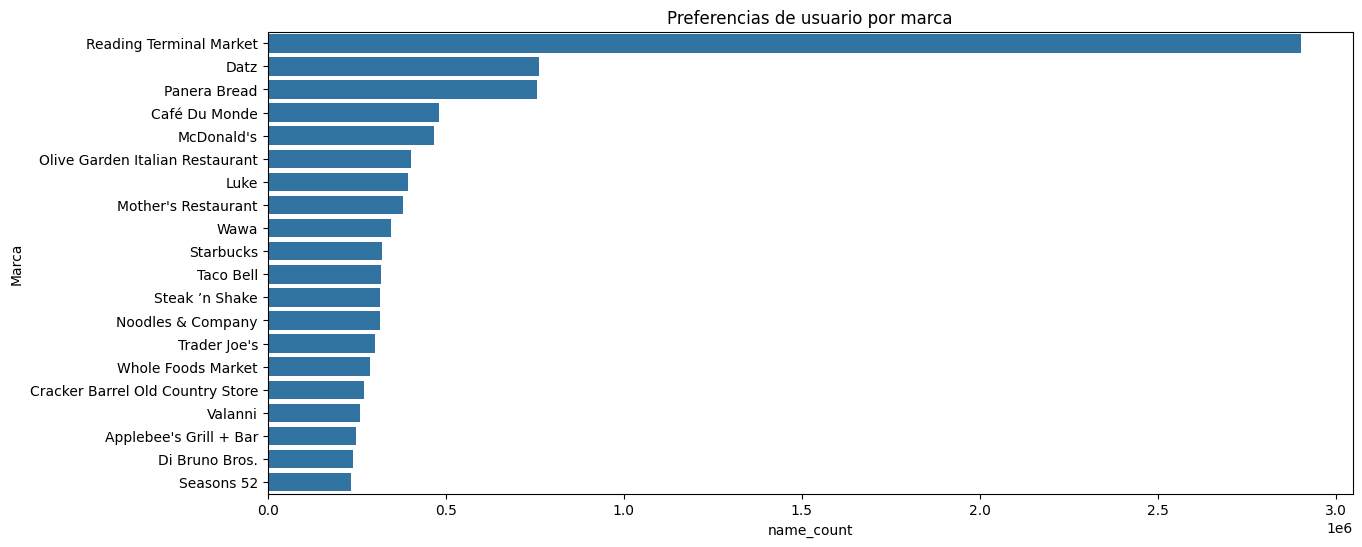

In [51]:
dfgy_names_top.rename(columns={'site_id': 'name_count'}, inplace=True)
dfgy_names_top = dfgy_names_top.sort_values('name_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="name_count", y="name", data=dfgy_names_top.head(20))
plt.title('Preferencias de usuario por marca')
plt.ylabel('Marca')

Conclusiones:
* Las dos marcas líderes como "Reading Terminal Market" y "Datz" ofrecen no solamente una experiencia gastronómica, sino un espacio social y de distensión. "Reading Terminal Market" es un espacio de paseo de compras y adyacentemente cuenta con un mercado gastronómico. Esta variable debe tenerse dentro de los atributos considerados para un sistema de recomendación
* Las dos marcas que le siguen son cafeterías, y luego sigue una marca de comidas rápidas ("McDonalds), para continuar con otros mercados de comida que ofrecen paseos
* Lo notable de esto es que no hay ningún restaurante tradicional dentro de las primeras diez marcas 

### Locaciones top

In [52]:
checkin_locations = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'state_city_postalcode']], on='site_id', how='inner')

In [53]:
checkin_locations = checkin_locations.loc[(checkin_locations['year'] >= 2010) & (checkin_locations['year'] <= 2021)]

In [54]:
checkin_locations.sample(2)

,source,site_id,datetime,year,month,state_city_postalcode
18342735,yelp,ATO_GTUMSEYBZn0v1cqg0g,2017-11-07 03:12:04,2017,11,MO - Creve Coeur - 63141
83280540,yelp,mjXIEy_xVd36aJqj9L2gBw,2012-02-28 02:03:36,2012,2,MO - Saint Louis - 63108


In [55]:
locations_top = checkin_locations.groupby(['state_city_postalcode']).agg({'datetime':'count'})
locations_top.rename(columns={'datetime':'checkins_count'}, inplace=True)
locations_top = locations_top.reset_index()
locations_top = locations_top.sort_values(by='checkins_count', ascending=False)

locations_top.head(10)

,state_city_postalcode,checkins_count
81756,PA - Philadelphia - 19107,6293218
37098,LA - New Orleans - 70130,5128700
10153,CA - Santa Barbara - 93101,3523678
81753,PA - Philadelphia - 19103,2478879
87402,TN - Nashville - 37203,1974045
37085,LA - New Orleans - 70116,1859501
81791,PA - Philadelphia - 19147,1698350
37084,LA - New Orleans - 70115,1608098
81755,PA - Philadelphia - 19106,1558856
32124,IN - Indianapolis - 46204,1520395


Text(0, 0.5, 'Locación')

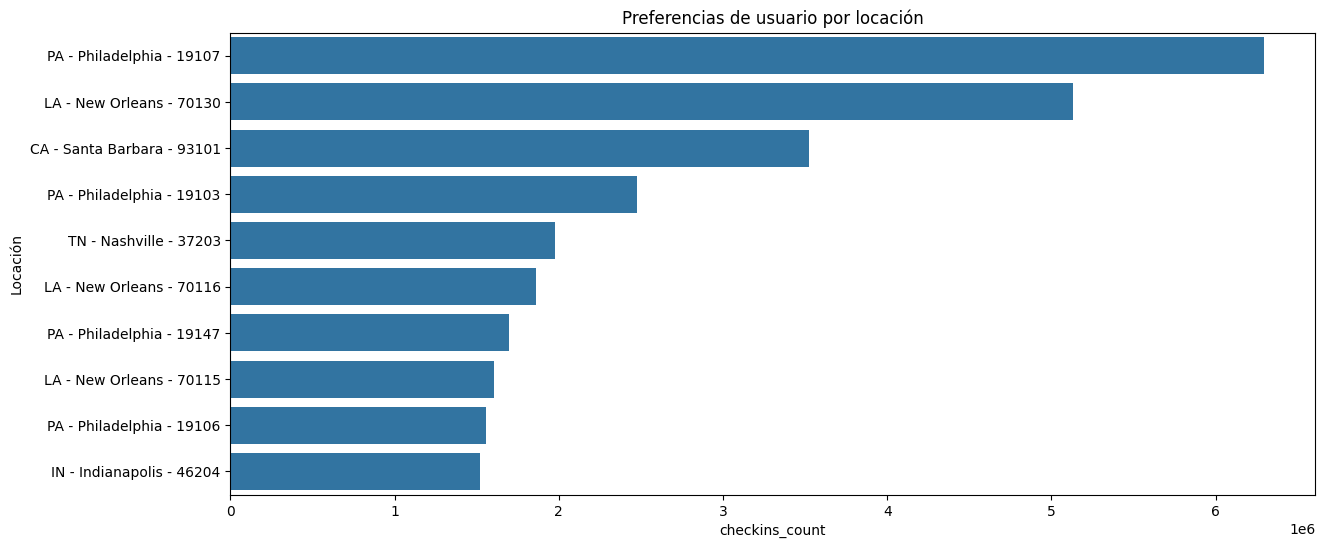

In [56]:
plt.figure(figsize=(14, 6))
sns.barplot(x="checkins_count", y="state_city_postalcode", data=locations_top.head(10))
plt.title('Preferencias de usuario por locación')
plt.ylabel('Locación')

Conclusiones:
* El gráfico de barras horizontales muestra la cantidad acumulada de check-ins, por locación (Estado - Ciudad - Código postal)
* Las locaciones líderes se encuentran en las ciudades de Philadelphia, New Orleans y Santa Barbara

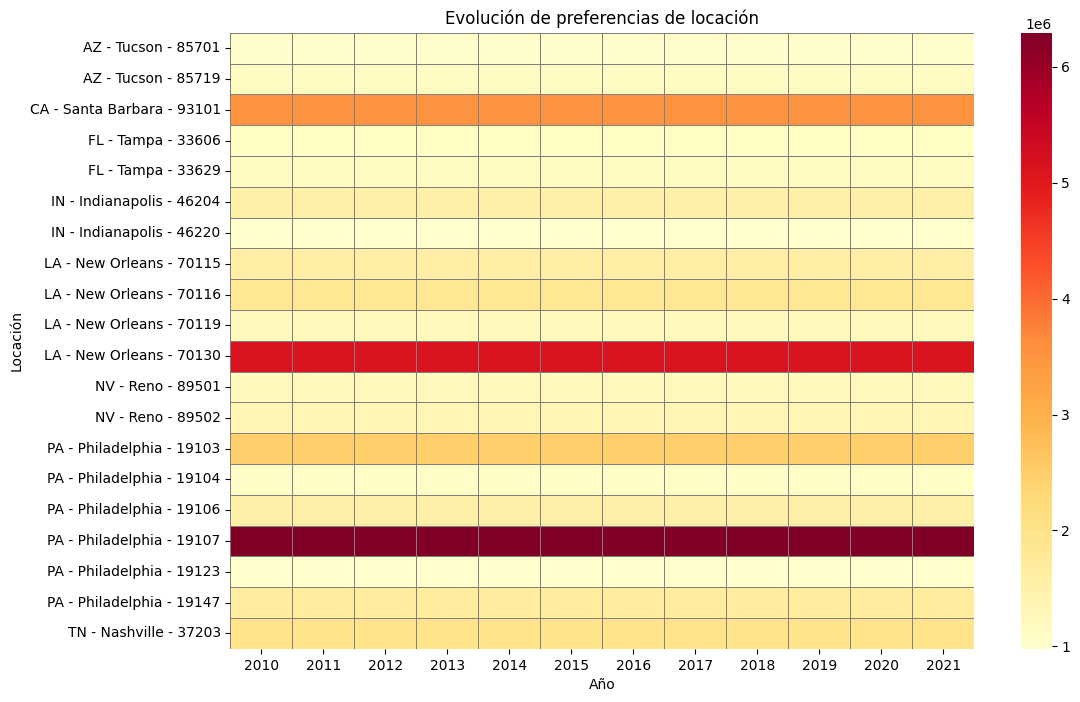

In [57]:
locations_top10 = locations_top.head(20)
locations_top_evol = pd.merge(checkin_locations, locations_top10, on='state_city_postalcode')
locations_top_evol_map = locations_top_evol.pivot_table(index='state_city_postalcode', columns='year', values='checkins_count', aggfunc='max')

plt.figure(figsize=(12, 8))
sns.heatmap(locations_top_evol_map, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Evolución de preferencias de locación')
plt.xlabel('Año')
plt.ylabel('Locación')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de los check-ins, por locación
* Se muestran las 20 locaciones más visitadas
* Las ciudades de Philadelphia, New Orleans y Santa Bárbara lideran el podio en diversos sitios

## Análisis de participación del usuario

### Involucramiento

In [58]:
customer_engagement = dfgy_reviews.groupby(['year']).agg({'datetime':'nunique', 'user_id':'nunique', 'site_id':'nunique'}).reset_index()
customer_engagement.rename(columns={'datetime':'reviews_count', 'user_id':'users_count', 'site_id':'sites_count'}, inplace=True)
customer_engagement['reviews_per_user'] = customer_engagement['reviews_count'] / customer_engagement['users_count']
customer_engagement['reviews_per_site'] = customer_engagement['reviews_count'] / customer_engagement['sites_count']

customer_engagement = customer_engagement.loc[(customer_engagement['year'] >= 2010) & (customer_engagement['year'] <= 2021)]
customer_engagement['year'] = customer_engagement['year'].astype(int)

customer_engagement

,year,reviews_count,users_count,sites_count,reviews_per_user,reviews_per_site
8,2010,20627,12087,8892,1.706544,2.319726
9,2011,36781,22105,14868,1.663922,2.473836
10,2012,47374,30459,20147,1.555337,2.351417
11,2013,64513,42954,25244,1.501909,2.555578
12,2014,85133,60275,30285,1.412410,2.811062
13,2015,131421,96712,45792,1.358890,2.869955
14,2016,300939,224901,80914,1.338095,3.719245
15,2017,666497,526146,107830,1.266753,6.180998
16,2018,1037783,828240,119870,1.252998,8.657571
17,2019,1284198,998926,125015,1.285579,10.272351


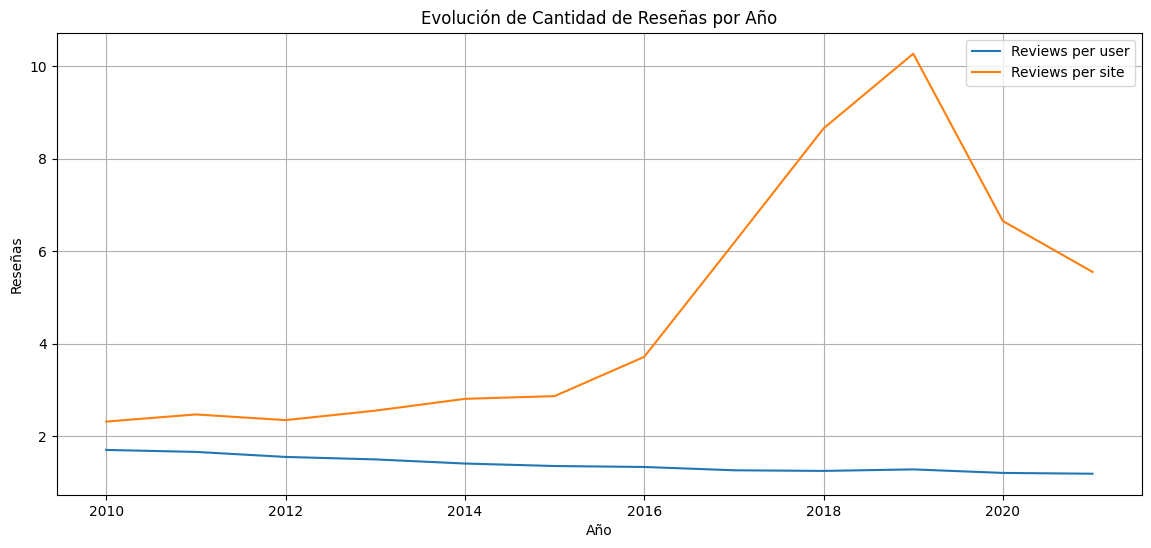

In [62]:
plt.figure(figsize=(14, 6))

sns.lineplot(customer_engagement, x='year', y='reviews_per_user', label='Reviews per user')
sns.lineplot(customer_engagement, x='year', y='reviews_per_site', label='Reviews per site')

plt.title('Evolución de Cantidad de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Reseñas')
plt.legend()
plt.grid(True)

plt.show()

Conclusión:
* Se muestran los promedios de reseñas por usuario y por local, respectivamente
* Se observa una leve tendencia a disminuir la cantidad de reseñas promedio por usuario
* Se obswerva una amplica tendencia a recibir más reseñas por local

### Satisfacción

In [60]:
customer_satisfaction = dfgy_reviews.groupby(['year']).agg({'rating':'mean', 'polarity':'mean'}).reset_index()
customer_satisfaction = customer_satisfaction.loc[(customer_satisfaction['year'] >= 2010) & (customer_satisfaction['year'] <= 2021)]

customer_satisfaction

,year,rating,polarity
8,2010,3.735321,0.731112
9,2011,3.731456,0.696383
10,2012,3.764233,0.682346
11,2013,3.759461,0.674966
12,2014,3.784492,0.662731
13,2015,3.816047,0.620421
14,2016,3.968633,0.562695
15,2017,4.101837,0.544397
16,2018,4.156560,0.544914
17,2019,4.201568,0.547265


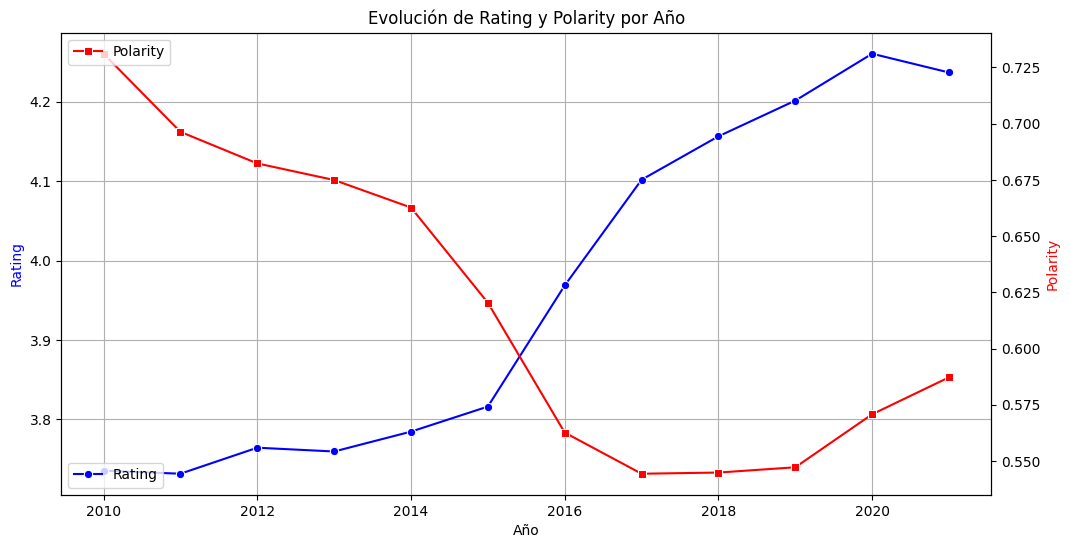

In [61]:
plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(data=customer_satisfaction, x='year', y='rating', color='blue', marker='o', label='Rating')

plt.xlabel('Año')
ax1.set_ylabel('Rating', color='blue')
plt.title('Evolución de Rating y Polarity por Año')
plt.grid(True)

ax2 = ax1.twinx()
sns.lineplot(data=customer_satisfaction, x='year', y='polarity', color='red', marker='s', label='Polarity', ax=ax2)
ax2.set_ylabel('Polarity', color='red')

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.show()

Concllusión:
* Se muestra la evolución anual de promedios de rating y polaridad del análisis de sentimientos preliminar
* SE observa claramente la mejora de la satisfacción del cliente a lo largo del tiempo
* Se observa una disminución e inicio de estabilización de la polaridad, lo cual es un indicador de una participación activa y proactiva del usuario en las reseñas

# Conclusiones
====================================================================================================================================

El presente EDA corresponde al análisis de oferta y demanda del dataset conjunto de Yelp y Google, así como el análisis de preferencias de usuarios.

El pre-procesamiento de datos consistió en las siguientes tareas:
* Gestión de tipos de datos
* Gestión de valores nulos
* Gestión de valores duplicados
* Gestión de características: eliminación de campos innecesarios y agregado de campos auxiliares 

Observaciones respecto al pre-procesamiento de datos:
* Se ha utilizado un dataset de códigos postales para corregir el dataset original de "business", ya que se detectó un error en el dataset original. 
* No se encontraron grandes cantidades de valores nulos, y no se encontraron duplicados que afecten a los datos. 
* Se modificaron algunos tipos de datos, sobre todo de aquellos campos de valor tipo "fecha"
* Se agregaron algunas características o campos auxiliares para facilitar el posterior agrupamiento y visualización de datos

Respecto al análisis de datos, se ha considerado estudiar el mercado a través de la oferta y demanda, y las preferencias del usuario. 
* Para valorizar la oferta, se ha considerado la cantidad de locales registrados en yelp
* Para valorizar la demanda, se ha considerado la cantidad de check-ins registrados
* Para conocer las preferencias del usuario, se consideran también los check-ins agrupados por categorías, marcas y locaciones

El interés específico de este análisis deviene en la definición de inputs y outputs a considerar en el modelo de Machine Learning, para luego definir los KPIs del proyecto, dashboard y producto final a presentar al cliente.

Inputs a considerar:
* Supra-categorías de comida
* Categorías de comida
* Atributos
* Marcas
* Locaciones
* Precio

Outputs a considerar:
* Proyección de ventas
* Proyección de check-ins
* Proyección de reseñas
* Proyección de satisfacción del cliente